In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from code.company_data_pipeline import *
from code.ticker_data_pipeline import *
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

In [30]:
s = get_series_list_from_files(limit=2000, min_mean_price_dollars=20)

1082

In [32]:
len(s)

1082

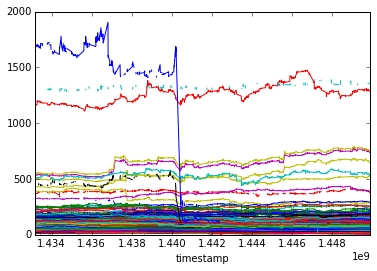

In [3]:
# Data! Horray!
df = pd.DataFrame(data=s).T
df.plot(legend=False)

In [4]:
# Deal with missing values
df = df.interpolate().fillna(method='bfill')

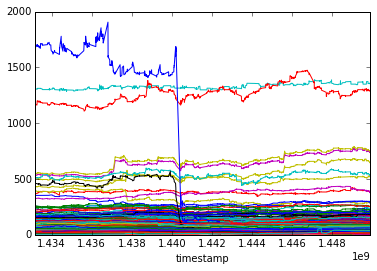

In [5]:
df.plot(legend=False)

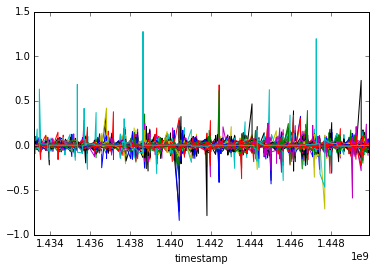

In [6]:
dif_df = df.pct_change().clip(-2, 2).fillna(0.)
dif_df.plot(legend=False)

In [7]:
# X[0] is now NAs because we diffed
X = dif_df.values[1:]
X

array([[ 0.        , -0.00377181, -0.01171495, ..., -0.00327022,
        -0.00201342,  0.        ],
       [ 0.        , -0.00118315,  0.009329  , ...,  0.00155414,
        -0.00571621,  0.        ],
       [ 0.        , -0.00047382,  0.00165352, ..., -0.00224138,
        -0.00473453,  0.        ],
       ..., 
       [ 0.0064538 , -0.00652681,  0.00043159, ...,  0.        ,
        -0.00471628,  0.        ],
       [ 0.00371245,  0.00164242, -0.00819672, ...,  0.00044553,
         0.00101833,  0.        ],
       [ 0.00302623, -0.00562193, -0.00217486, ...,  0.00044534,
         0.00847745,  0.        ]])

In [23]:
dif_df.columns

Index([u'aaap', u'aal', u'aaon', u'aapl', u'aaww', u'abax', u'abcb', u'abco',
       u'abcw', u'abmd',
       ...
       u'z', u'zbio', u'zbra', u'zfgn', u'zg', u'zion', u'zltq', u'zsph',
       u'zumz', u'zvv'],
      dtype='object', length=1082)

In [13]:
# Load data about the companies
with open(PROJECT_HOME + 'data/company/nasdaq_descriptions.tsv') as f:
    company_df = pd.read_csv(f, 
                         sep='\t', 
                         header=None)
company_df.columns = ['ticker', 'description']
company_df = company_df.dropna().set_index('ticker')

tv = TfidfVectorizer(stop_words='english')
tfidf = tv.fit_transform(company_df.description)
features = np.array(tv.get_feature_names())
# Change the 2d array to a list of 1d arrays
tfidf = map(lambda x: x.flatten(), np.vsplit(tfidf.toarray(), tfidf.shape[0]))
company_df['tfidf'] = tfidf
company_df.head()

,description,tfidf
ticker,,
aaap,We are an innovative radiopharmaceutical compa...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aal,"American Airlines Group Inc. (AAG), a Delaware...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aame,"Atlantic American Corporation, a Georgia corpo...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aaoi,This report contains forward-looking statement...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aaon,"AAON, Inc., a Nevada corporation, (""AAON Nevad...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [29]:
# Throw out comapanies where we don't have a good description
company_df = company_df[company_df.description.apply(lambda x: len(x) > 100)]

In [37]:
n_components=25
pca = PCA(n_components=n_components)
pca.fit(X)

PCA(copy=True, n_components=25, whiten=False)

In [38]:
comp_companies = {}

for component in range(n_components):
    idx = np.argsort(pca.components_[component])[:20]
    comp_companies[component] = df.columns[idx]
    # print comp_companies[component]
    # print np.sort(pca.components_[component])[:20]
    
print comp_companies[0]

Index([u'ubio', u'vxdn', u'sedg', u'xlrn', u'ovas', u'hznp', u'ptct', u'espr',
       u'cemp', u'cybr', u'egrx', u'csiq', u'hrtx', u'blue', u'prta', u'nbix',
       u'tsro', u'rdus', u'rare', u'once'],
      dtype='object')


In [ ]:
company_df.ix[company_vector_plus, :]['tfidf'].mean().argsort()[::-1][:20]